2025-12-07 21:21:11,319 - INFO - SEMPIPES> Interactive mode detected, enabling code generation in preview mode.


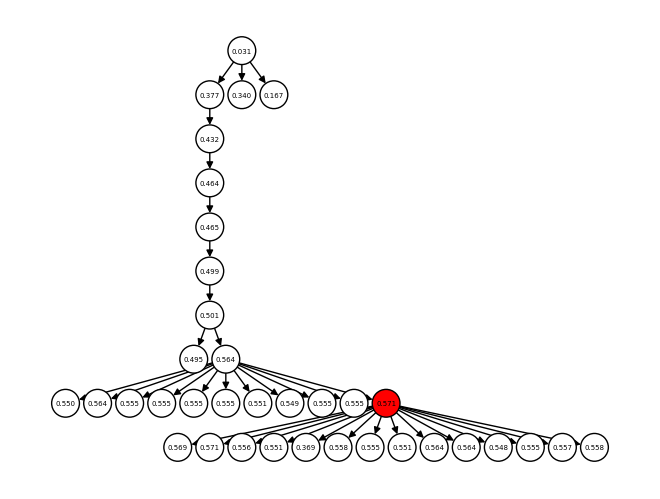

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

import sempipes
from sempipes.optimisers.trajectory import load_trajectory_from_json

# This requires a trajectory to be present
trajectory = load_trajectory_from_json(".sempipes_trajectories/fraudbaskets_20251123_182555_d9a27ed5.json")

attributes = {}
edges = []

for outcome in trajectory.outcomes:
    node_id = outcome.search_node.trial
    if outcome.search_node.parent_trial is not None:
        parent_node_id = outcome.search_node.parent_trial
        edges.append((parent_node_id, node_id))
    attributes[node_id] = {"score": f"{outcome.score:.3f}"}

G = nx.DiGraph()
G.add_edges_from(edges)
nx.set_node_attributes(G, attributes)

# Identify node with highest score
best_node = max(attributes, key=lambda n: attributes[n]["score"])
# print(f"Best node: {best_node}, score: {attributes[best_node]['score']:.3f}")

# Assign colors (red for best node)
node_colors = ["red" if node == best_node else "white" for node in G.nodes()]

G.graph["graph"] = {"ranksep": "50.0", "nodesep": "50.0"}

labels = nx.get_node_attributes(G, "score")
pos = nx.nx_pydot.graphviz_layout(G, prog="dot")


nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    arrows=True,
    node_size=400,
    node_color=node_colors,  # "white",
    edgecolors="black",
    font_size=5,
)
plt.show()

In [2]:
best_outcome = max(trajectory.outcomes, key=lambda x: (x.score, -x.search_node.trial))

In [6]:
print(best_outcome.state["generated_code"])

import pandas as pd
import numpy as np

def _sem_agg_join(left_join_column, left_df, right_join_column, right_df):
    """
    Aggregates right_df features and left joins them to left_df.
    
    Args:
        left_join_column (str): The column in left_df to join on.
        left_df (pd.DataFrame): The left dataframe.
        right_join_column (str): The column in right_df to join on.
        right_df (pd.DataFrame): The right dataframe to aggregate and join.
    
    Returns:
        pd.DataFrame: The left_df with new aggregated features joined.
    """
    
    # Aggregate required features at the basket_ID level
    agg_df = right_df.groupby(right_join_column).agg(
        total_basket_cash_price=('cash_price', 'sum'),
        total_basket_product_units=('Nbr_of_prod_purchas', 'sum'),
        # Feature: num_unique_items_in_basket
        # Description: This feature counts the number of distinct 'item' categories purchased within each basket.
        # Rationale: Anomalous or fraudu

In [7]:
trajectory.sempipes_config

Config(llm_for_code_generation=LLM(name='gemini/gemini-2.5-flash', parameters={'temperature': 2.0}), llm_for_batch_processing=LLM(name='ollama/gpt-oss:120b', parameters={'api_base': 'http://localhost:11434', 'temperature': 0.0}), batch_size_for_batch_processing=20, prefer_empty_state_in_preview=True)